In [18]:
import numpy as np
import math
from scipy.stats import pearsonr
import statsmodels.api as sm   
import random

In [40]:
n = 1001
z = np.linspace(-math.pi,math.pi,n)
z.resize(n,1)
e = np.random.randn(n,1)

In [41]:
y = np.sin(3*z/2) + e
y.shape

(1001, 1)

In [42]:
e_y = np.sin(3*z/2)

In [43]:
def empirical_risk(data,labels,n,e_y):
    regr = sm.OLS(labels,data) ##OLS
    res = regr.fit()   ##outcome
    res.params.resize(res.params.shape[0],1)
    risk = (np.dot(data,res.params) - e_y)**2
    risk = np.true_divide(risk,n)
    risk = np.sum(risk)
    return risk

In [44]:
x = np.ones((n,1))
col = []
tmp_m = np.ones((n,1))
for i in range(1,21):
    tmp_m = z**i
    x = np.c_[x,tmp_m]
    print(x)
    risk = empirical_risk(x,y,n,e_y)
    #print("k=",i,"empirical risk=",risk)
    col.append(risk)
print(col)

[[ 1.         -3.14159265]
 [ 1.         -3.13530947]
 [ 1.         -3.12902628]
 ...
 [ 1.          3.12902628]
 [ 1.          3.13530947]
 [ 1.          3.14159265]]
[[ 1.         -3.14159265  9.8696044 ]
 [ 1.         -3.13530947  9.83016546]
 [ 1.         -3.12902628  9.79080548]
 ...
 [ 1.          3.12902628  9.79080548]
 [ 1.          3.13530947  9.83016546]
 [ 1.          3.14159265  9.8696044 ]]
[[  1.          -3.14159265   9.8696044  -31.00627668]
 [  1.          -3.13530947   9.83016546 -30.82061085]
 [  1.          -3.12902628   9.79080548 -30.63568768]
 ...
 [  1.           3.12902628   9.79080548  30.63568768]
 [  1.           3.13530947   9.83016546  30.82061085]
 [  1.           3.14159265   9.8696044   31.00627668]]
[[  1.          -3.14159265   9.8696044  -31.00627668  97.40909103]
 [  1.          -3.13530947   9.83016546 -30.82061085  96.63215301]
 [  1.          -3.12902628   9.79080548 -30.63568768  95.85987194]
 ...
 [  1.           3.12902628   9.79080548  30.63

In [8]:
tmp_m.shape

(1001, 1)

In [45]:
import numpy as np
import math
from scipy.stats import pearsonr
import statsmodels.api as sm   
import random


def empirical_risk(data,labels,n,e_y):
    regr = sm.OLS(labels,data) ##OLS
    res = regr.fit()   ##outcome
    res.params.resize(res.params.shape[0],1)
    risk = (np.dot(data,res.params) - e_y)**2
    risk = np.true_divide(risk,n)
    risk = np.sum(risk)
    return risk


def k_times_empirical_risk(k,n):
    z = np.linspace(-math.pi,math.pi,n)
    z.resize(n,1)
    e = np.random.randn(n,1)
    y = np.sin(3*z/2) + e
    e_y = np.sin(3*z/2)
    x = np.ones((n,1))
    col = []
    for i in range(1,k+1):
        tmp_m = z**i
        x = np.c_[x,tmp_m]
        risk = empirical_risk(x,y,n,e_y)
        #print("k=",i,"empirical risk=",risk)
        col.append(risk)
    return col



if __name__ == '__main__':
    k = 20
    n = 1001
    k_risk = []
    for i in range(1,1001):
        tmp_c = k_times_empirical_risk(k,n)
        k_risk.append(tmp_c)
    k_risk = np.array(k_risk)
    k_risk = np.sum(k_risk,axis=0)
    k_risk = k_risk/1000
    print(k_risk)

[0.49610046 0.49707766 0.09596023 0.09695614 0.00841753 0.00944909
 0.0079516  0.00905244 0.00996484 0.01096492 0.01193307 0.0129564
 0.01395332 0.01491135 0.01599065 0.01694755 0.01788526 0.01892608
 0.01992183 0.02095588]


<function matplotlib.pyplot.show(*args, **kw)>

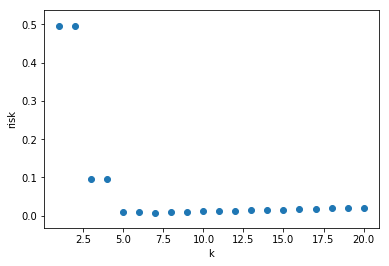

In [46]:
import matplotlib.pyplot as plt
k = list(range(1,21))
plt.scatter(k,k_risk)
plt.xlabel("k")
plt.ylabel("risk")
plt.show

[0.49616435 0.49710513 0.09600452 0.09701157 0.0085101  0.00951808
 0.00800012 0.00902085 0.01001141 0.01103775 0.01206804 0.01299738
 0.01405184 0.0150606  0.01603714 0.01701356 0.01800195 0.01910226
 0.02005818 0.02103459]


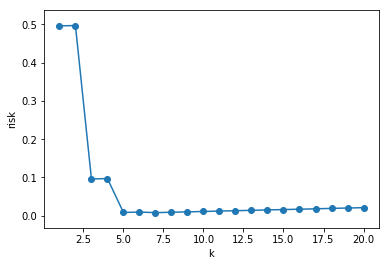

In [4]:
import numpy as np
import math
from scipy.stats import pearsonr
import statsmodels.api as sm   
import random
import matplotlib.pyplot as plt


def empirical_risk(data,labels,n,e_y):
    regr = sm.OLS(labels,data) ##OLS
    res = regr.fit()   ##outcome
    res.params.resize(res.params.shape[0],1)
    risk = (np.dot(data,res.params) - e_y)**2
    risk = np.true_divide(risk,n)
    risk = np.sum(risk)
    return risk


def k_times_empirical_risk(k,n):
    z = np.linspace(-math.pi,math.pi,n)
    z.resize(n,1)
    e = np.random.randn(n,1)
    y = np.sin(3*z/2) + e
    e_y = np.sin(3*z/2)
    x = np.ones((n,1))
    col = []
    for i in range(1,k+1):
        tmp_m = z**i
        x = np.c_[x,tmp_m]
        risk = empirical_risk(x,y,n,e_y)
        #print("k=",i,"empirical risk=",risk)
        col.append(risk)
    return col



if __name__ == '__main__':
    k = 20
    n = 1001
    k_risk = []
    for i in range(1,1001):
        tmp_c = k_times_empirical_risk(k,n)
        k_risk.append(tmp_c)
    k_risk = np.array(k_risk)
    k_risk = np.sum(k_risk,axis=0)
    k_risk = k_risk/1000
    print(k_risk)

    k = list(range(1,21))
    plt.scatter(k,k_risk)
    plt.xlabel("k")
    plt.ylabel("risk")
    plt.plot(k,k_risk)